.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

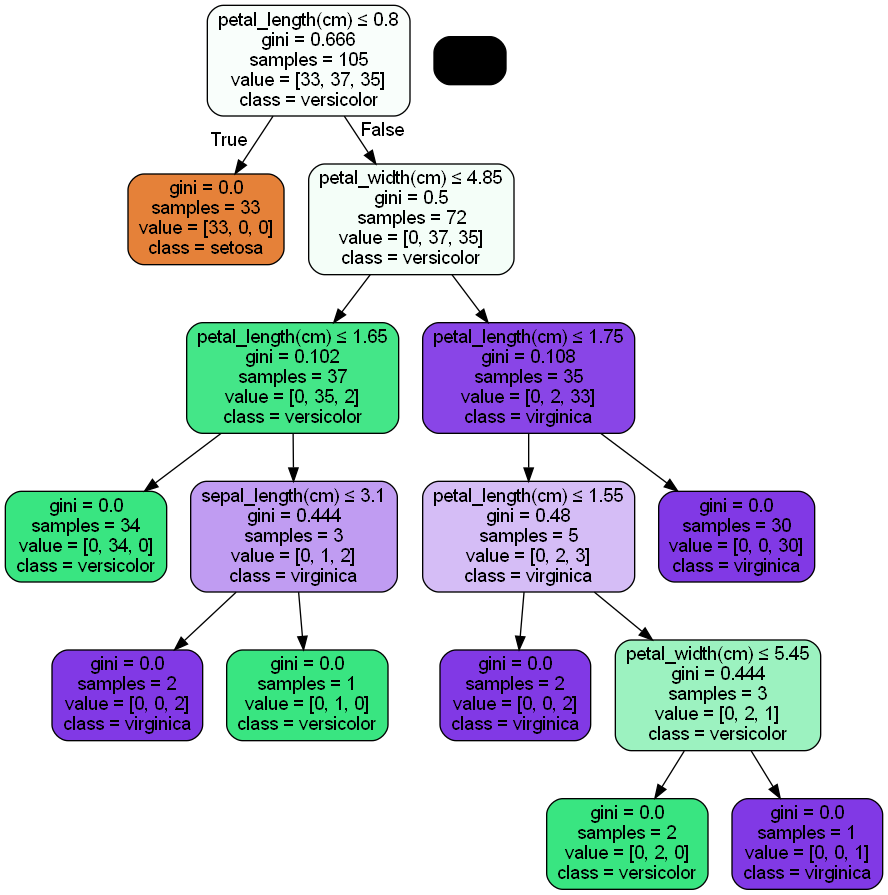

In [1]:
# -*- coding: utf-8 -*-
'''
결정나무_수업.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1kTh4Wso5Hi7Sjv6OH7826WzyI55bakha
'''

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()

print(iris.DESCR)

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])

df.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#데이터 중에서 70%는 training data고 30%가 test data로 되는 거

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
#의사 결정 나무 생성

clf = clf.fit(X_train, y_train)
#의사 결정 나무를 훈련

y_pred = clf.predict(X_test)
#테스트 데이터 셋을 통해서 예측

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#모델이 얼마나 정확한지를 알 수 있다
'''
pip install graphviz
pip install pydotplus
'''
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, feature_names = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'],
                          class_names=iris.target_names, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())